In [9]:
!pip install pandas
!pip install seaborn


In [10]:
import  numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
# Load the dataset
# df = pd.read_csv("Mall_Customers.csv")
# Correct file path
df = pd.read_csv("/Users/mirnabadr/Downloads/Mall_Customers.csv")

print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [19]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# shape of dataset
df.shape

(200, 5)

In [23]:
#describe dataset 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
# check data type of each variables that are present in dataset
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [25]:
#check if dataset has any null values 
# our dataset here does not have any null values so saving our time of handling our null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
# drop our customer id because we don't need it to analyize our data(axis=1 because we want to drop coloumn)
df.drop(["CustomerID"], axis= 1, inplace = True)

In [27]:
# check our dataset so customer ID coloumn has been deleted 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/var/folders/0v/ntgv58wj66jcm4np1_bkg3rw0000gn/T/ipykernel_1110/2656524305.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
/var/folders/0v/ntgv58wj66jcm4np1_bkg3rw0000gn/T/ipykernel_1110/2656524305.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
/var

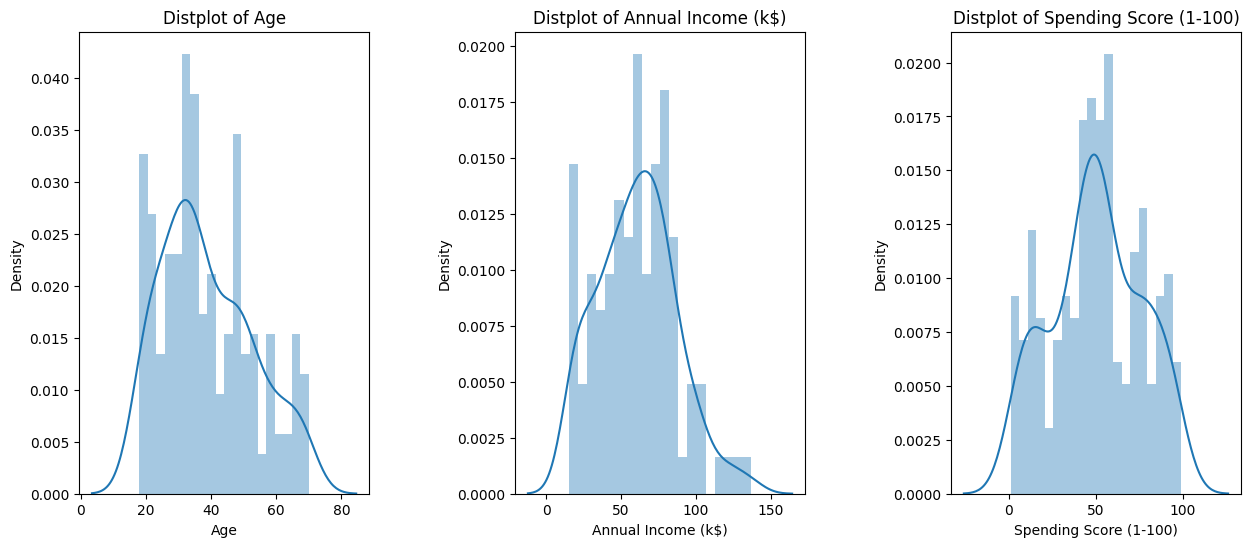

In [31]:
# start analysis and visualization of data 
# create distribution plot for each annual income and spending score 
# create for loop to represent graph for 3 variables we have (Age, annual income, spending score) 
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

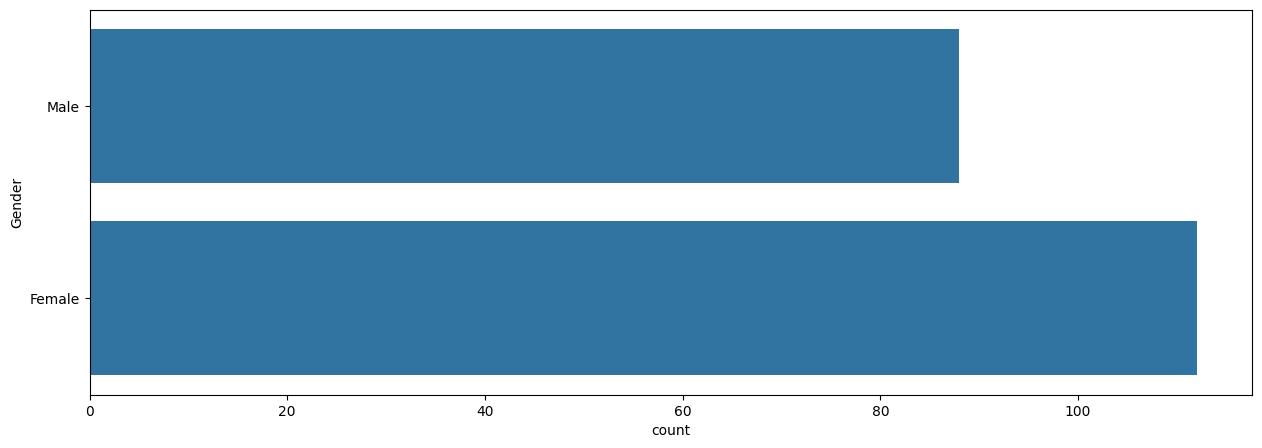

In [32]:
# number of female in data here are more than no of male. 
plt.figure(figsize=(15, 5))
sns.countplot(y= 'Gender', data= df)
plt.show()

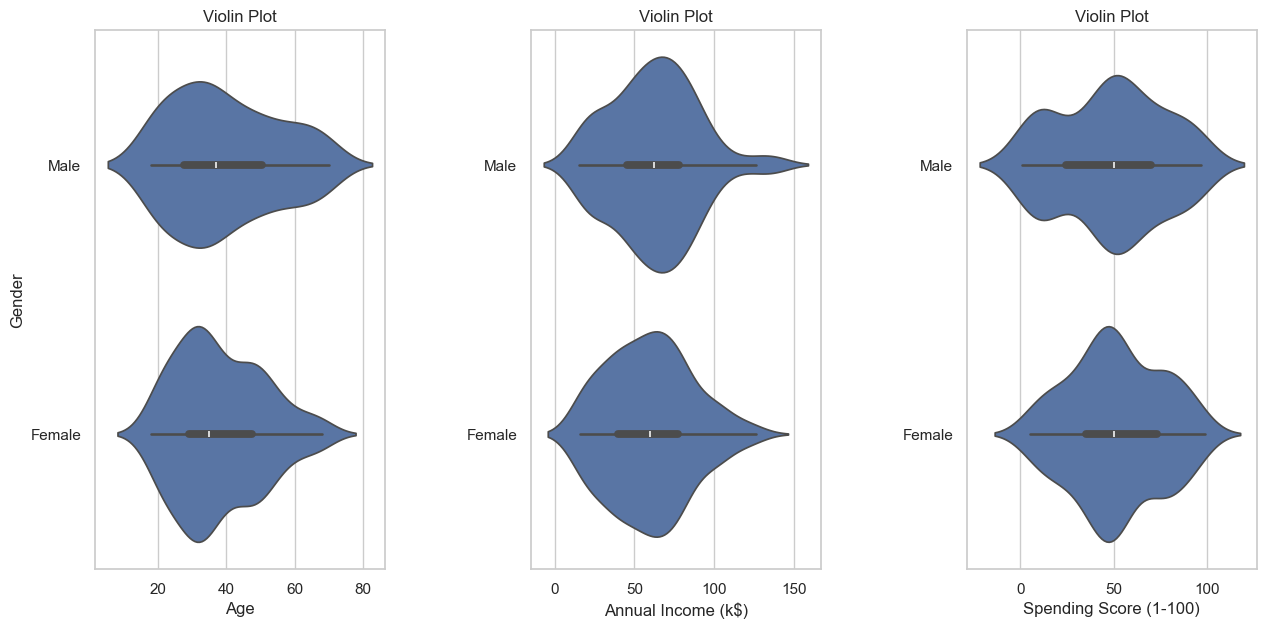

In [34]:
# represent data using just Gender on our y axis(Distribution of Age , annual income , spending score based on Gender) 
plt.figure(1, figsize = (15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

/var/folders/0v/ntgv58wj66jcm4np1_bkg3rw0000gn/T/ipykernel_1110/2067328887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= agex, y= agey, palette = "mako")


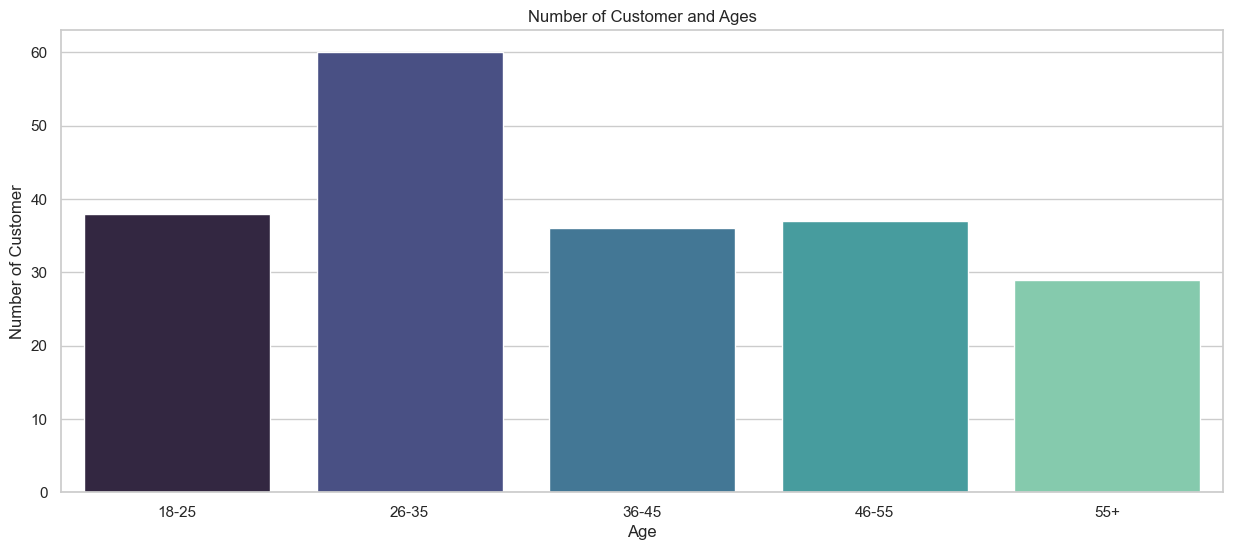

In [37]:
# for better analysis and visualization so we will divide age into different categories and then visualize data to understand which range of age has the highest number of customers
# The highest number of customers is between age 26-35.
age_18_25 = df.Age[(df.Age >= 18 ) & (df.Age <= 25) ]
age_26_35 = df.Age[(df.Age >= 26 ) & (df.Age <= 35) ]
age_36_45 = df.Age[(df.Age >= 36 ) & (df.Age <= 45) ]
age_46_55 = df.Age[(df.Age >= 46 ) & (df.Age <= 55) ]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize = (15, 6))
sns.barplot(x= agex, y= agey, palette = "mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


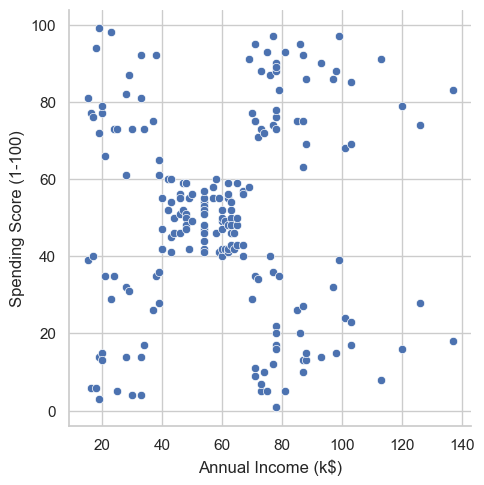

In [39]:
# The relationship between annual income and spending score 
# The graph apperas that there is no relationship between annual income and spending score.
# But there is some relationships with customers who have annual income between 40k-60k 
sns.relplot(x = "Annual Income (k$)",y= "Spending Score (1-100)" , data=df )

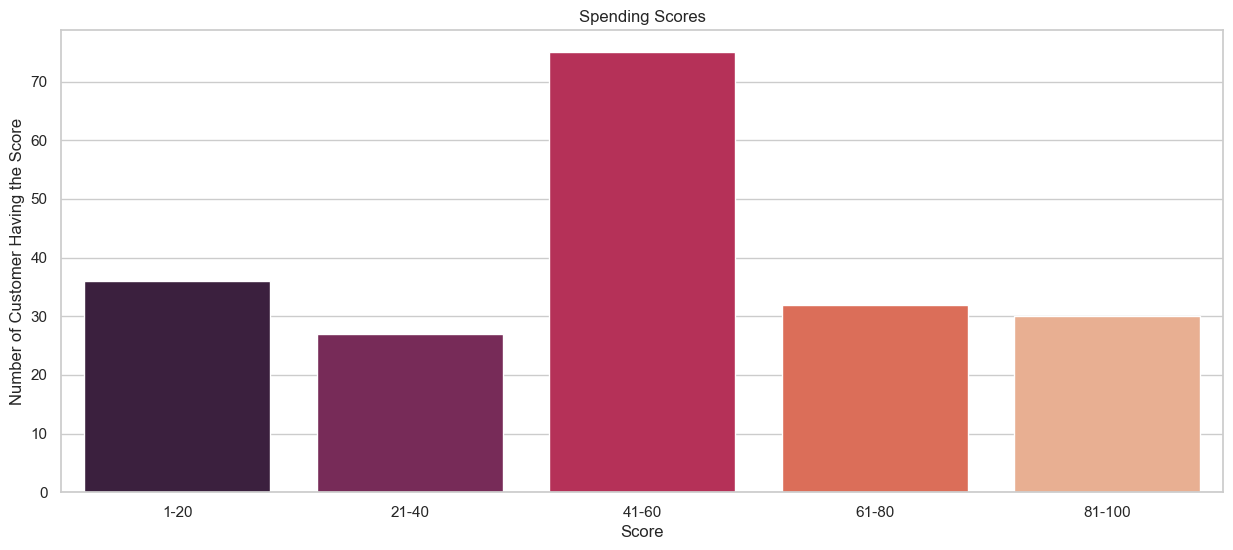

In [53]:
#divide our spending score into different categories and then represent it 
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx= ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy= [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15, 6)) 
sns.barplot(x=ssx, y=ssy, palette="rocket", hue=ssx, dodge=False)
# sns.barplot(x=ssx, y=ssy, palette="rocket")



plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

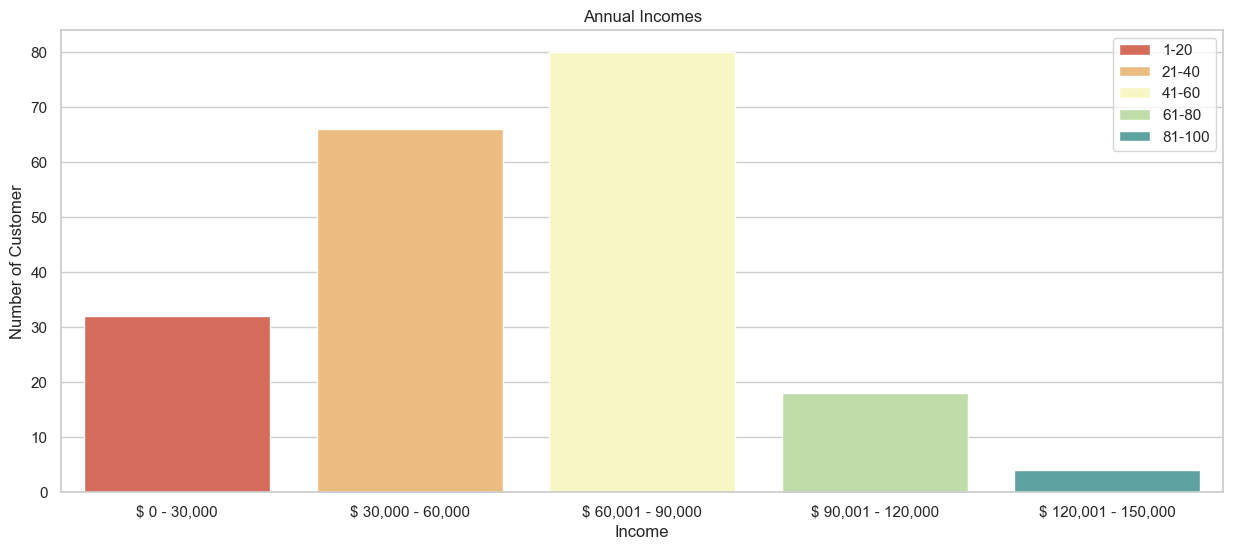

In [55]:
# divide total Annual income data into different categories 
# In graph it appears that most of our customers have annual income between $60,001-90,000
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,000 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette= "Spectral", hue=ssx, dodge=False)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

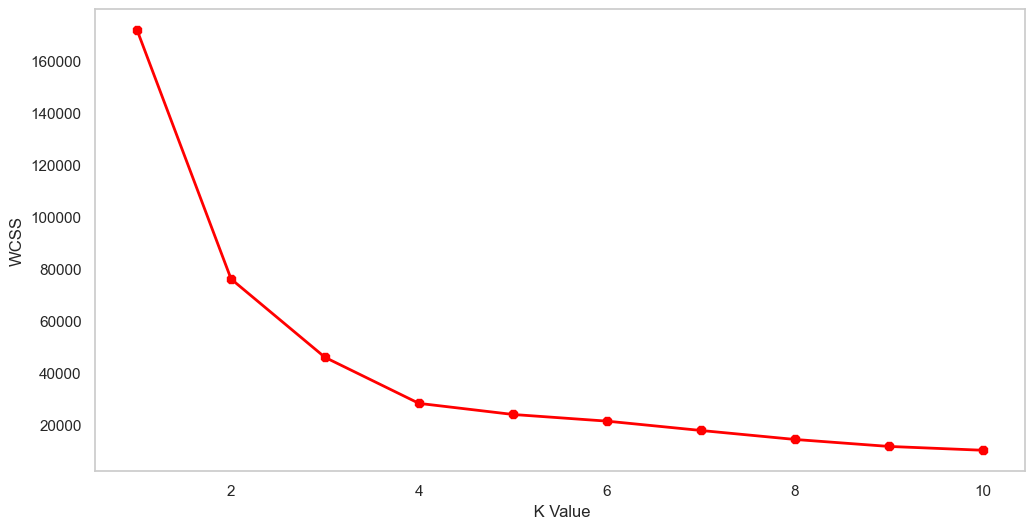

In [62]:
# we finish above visualizing and analyize our data now we will start with clustering process
# Find out optimum numbers of clusters we need to create 
# initially we will find relationship between age and spending score and cluster data accordingly
!pip install scikit-learn

X1 = df.loc[: , ["Age","Spending Score (1-100)"]].values 
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize = (12, 6 ))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color= "red", marker = "8")
plt.xlabel(" K Value")
plt.ylabel("WCSS")
plt.show 

In [65]:
# Graph seems to be a little constant at 4 so choose k=4 
# our data is divided to 4 clusters (0, 1, 2, 3)
kmeans = KMeans(n_clusters = 4)

label = kmeans.fit_predict(X1)

print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [67]:
# check centroids for x, y coordinates 
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


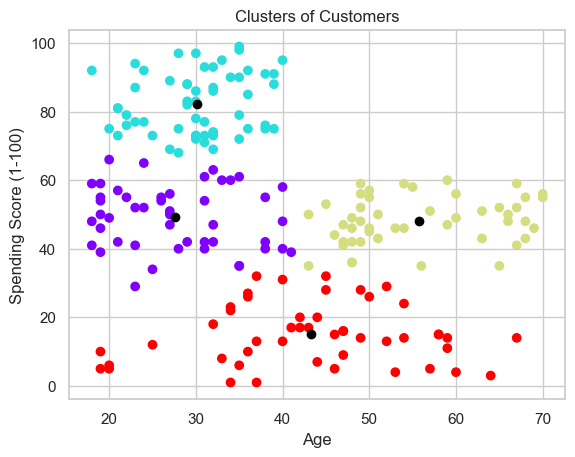

In [69]:
# visualize clusters into graphs 
# cluster centers are going to be represented with black while all other labels in different colors 
# This is cluster based on Age and Spending score.
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, cmap = 'rainbow' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

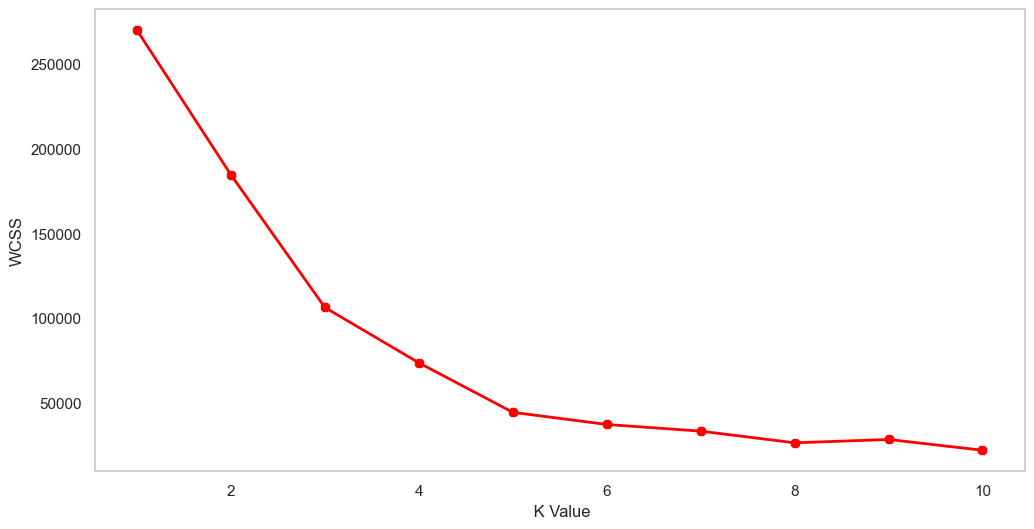

In [70]:
# Clustering annual income and spending score 
# It appears that graph is constant at 5 so choose optimum number of clusters in this case k=5
X2 = df.loc[: , ["Annual Income (k$)","Spending Score (1-100)"]].values 
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize = (12, 6 ))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color= "red", marker = "8")
plt.xlabel(" K Value")
plt.ylabel("WCSS")
plt.show 


In [76]:
# 4 clusters have been created and data has been distrbuted accordingly 
kmeans = KMeans(n_clusters = 4 )
label = kmeans.fit_predict(X2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [77]:
# check centroids of clusters (those are x, y coordinates of all 5 clusters that are created )
print(kmeans.cluster_centers_)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [48.16831683 43.3960396 ]
 [25.72727273 79.36363636]]


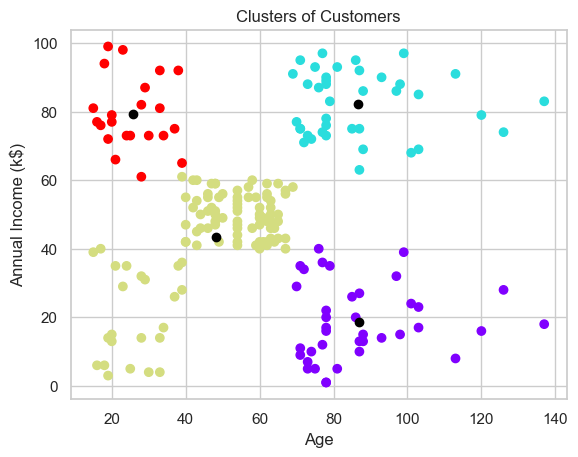

In [78]:
# represent clusters using scatter plot 
# Data has been divided into 4 clusters and black dots represent clusters centroids.
plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, cmap = 'rainbow' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

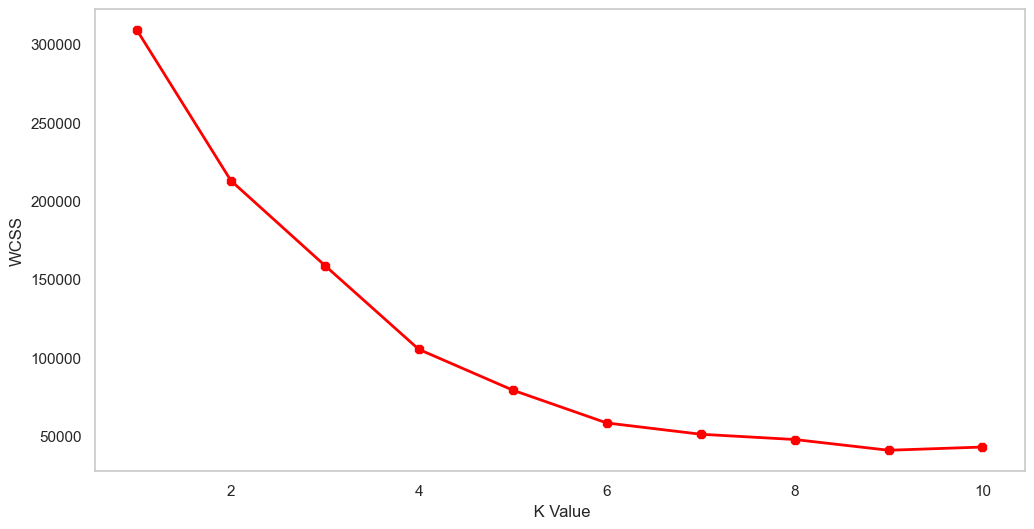

In [79]:
# consider all 3 together age, annual income and spending score (included all columns from 1 to last coloumns )
X3 = df.iloc[:, 1:] # This represent including all coloumns from 1 till the end 

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize = (12, 6 ))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color= "red", marker = "8")
plt.xlabel(" K Value")
-plt.ylabel("WCSS")
plt.show 


In [81]:
# choose 5 cluters k=5
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)
print(label)


[4 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2
 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2
 1 1 1 1 1 2 1 1 1 1 1 1 3 1 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [84]:
# we have included 3 variables(Age, annual income , spending score) here so thats the reason we have x, y and z coordinates for each of our centriods.
print(kmeans.cluster_centers_)

[[41.64705882 88.73529412 16.76470588]
 [33.39622642 58.05660377 48.77358491]
 [54.06       40.46       36.72      ]
 [32.69230769 86.53846154 82.12820513]
 [25.25       25.83333333 76.91666667]]


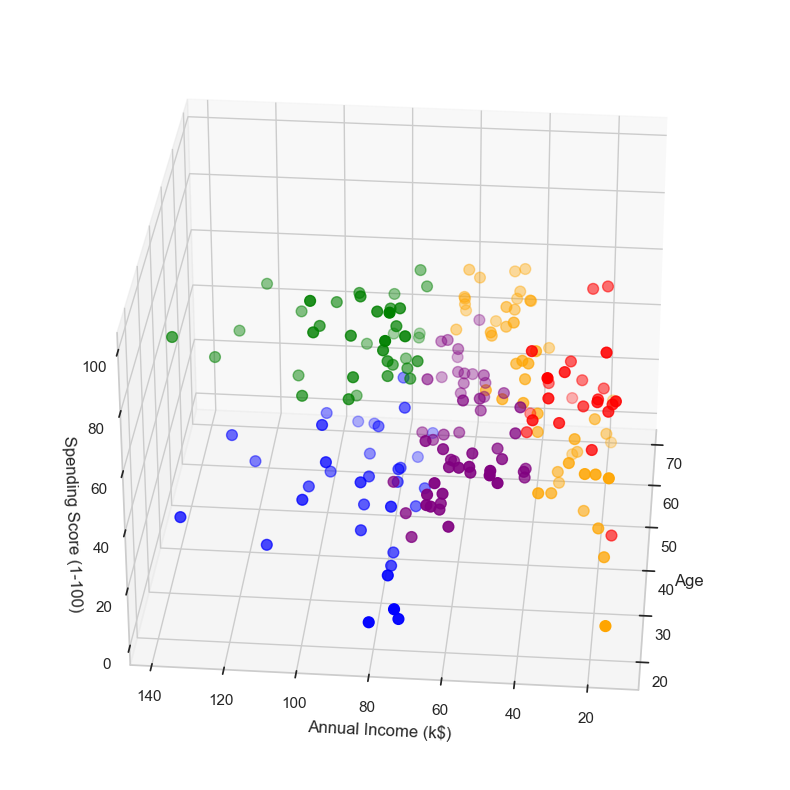

In [86]:
# represent 3D graph for the 3 axis 
clusters = kmeans.fit_predict(X3)
df["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c = 'purple', s = 60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()